In [ ]:
!pip install pymysql

In [113]:
import itertools
numbers="017"
[''.join(list(itertools.permutations(numbers,i))) for i in range(len(numbers))]



TypeError: sequence item 0: expected str instance, tuple found

In [ ]:
(0, 9, 1)

In [94]:
#인덱스 번호와 원소 번호
t = [1, 5, 7, 33, 39, 52]
for p in enumerate(t):
    print(p)
for i, v in enumerate(t):
    print("index : {}, value: {}".format(i,v))

(0, 1)
(1, 5)
(2, 7)
(3, 33)
(4, 39)
(5, 52)
index : 0, value: 1
index : 1, value: 5
index : 2, value: 7
index : 3, value: 33
index : 4, value: 39
index : 5, value: 52


In [2]:
query= """
     SELECT L_CTG, PRDT_NM
     FROM super_order_out_2020
     """
def query_MariaDB(query):
    import pandas as pd
    import pymysql
    conn = pymysql.connect(host='10.231.238.236', port=31000,user='lglopt', password='123bigdata',database='super_order')
    query_result = pd.read_sql(query, conn)
    return query_result

v=query_MariaDB(query) 

In [3]:
v=v.drop_duplicates()
v.reset_index(inplace=True)
import re
v['PRDT_NM']=v['PRDT_NM'].apply(lambda x : re.sub(" ","",x))
v.rename(columns={'PRDT_NM':'ITEM_NAME'},inplace=True)
v=v[['L_CTG','ITEM_NAME']]

In [4]:
v['fresh']=v['L_CTG'].isin(['일반식품', '음료', '채소', '낙농', '신선채소', '수산',
       '유제품', '조리식품', '냉장', '과일', '축산', '냉장반찬', '커피차', '상온HMR',
       '냉동HMR', '냉동', '면류', '선어', '곡물', '디저트', '건어', '식사', '냉장HMR', '국내산축산',
       '간식', '가공채소/계란', '수입과일', '국산과일', '건식품', '수입축산', '반찬', '육가공류'])

In [5]:
import pandas as pd
lu=pd.read_csv('pos_total.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
lu['ITEM_NAME']=lu['ITEM_NAME'].apply(lambda x : re.sub(" ","",x))

In [194]:
def rank(customer_name):
    bu=lu[lu['CUSTOMER_NAME']==customer_name]
    bu=bu[['SALE_DATE','ITEM_NAME','SALE_HOUR','SALE_CNT']].groupby(['SALE_DATE','ITEM_NAME','SALE_HOUR']).count().reset_index()
    sample=pd.merge(bu,v,on='ITEM_NAME')
    sample=sample.groupby(['L_CTG']).sum().reset_index()
    sample['rank']=sample['SALE_CNT'].rank(ascending=False)
    sample['customer_name']=customer_name
    sample=sample[['L_CTG','SALE_CNT','rank','customer_name']]
    return sample

# view=sample.groupby(['SALE_DATE','L_CTG']).sum().reset_index()
# for i in range(len(view['SALE_DATE'].value_counts().index)):
#     view.loc[view['SALE_DATE']==view['SALE_DATE'].value_counts().index[i],'rank']=view[view['SALE_DATE']==view['SALE_DATE'].value_counts().index[i]]['SALE_CNT'].rank(ascending=False)
# for i in range(40):
#     if len(view[view['rank']==i]['L_CTG'].value_counts())!=1:
#         print((view[view['rank']==i]['L_CTG'].value_counts()))
#     else:
#         print('.')

In [49]:
def rank(customer_name):
    bu=lu[lu['CUSTOMER_NAME']==customer_name]
    bu=bu[['ITEM_NAME','SALE_CNT']].groupby(['ITEM_NAME']).sum().reset_index()
    sample=pd.merge(bu,v,on='ITEM_NAME')
    sample=sample.groupby(['L_CTG']).sum().reset_index()
    sample['rank']=sample['SALE_CNT'].rank(ascending=False)
    sample['customer_name']=customer_name
    sample=sample[['L_CTG','SALE_CNT','rank','customer_name','fresh']]
    sample=sample.sort_values('rank')
    return sample

In [9]:
do=lu[['ITEM_NAME','SALE_CNT','CUSTOMER_NAME']].groupby(['ITEM_NAME','CUSTOMER_NAME']).sum().reset_index()
sample=pd.merge(do,v,on='ITEM_NAME')

In [ ]:
il=pd.concat([rank(i) for i in lu['CUSTOMER_NAME'].value_counts()[:60].index])

In [11]:
fff=sample.groupby(['fresh','CUSTOMER_NAME']).sum().reset_index()

In [41]:
#diff=pd.merge(ye,no,on='CUSTOMER_NAME')
diff['total']=diff['FFCNT']+diff['TTCNT']

In [42]:
diff['pp']=diff['err']/diff['total']

In [48]:
diff[~diff['CUSTOMER_NAME'].str.contains('폐')].sort_values('pp',ascending=False)[389:]

,index_x,fresh_x,CUSTOMER_NAME,TTCNT,index_y,fresh_y,FFCNT,err,total,pp
357,793,True,잠원점,1083076,358,False,1195400,112324,2278476,0.049298
304,740,True,오토프레시부산센터,659854,305,False,726518,66664,1386372,0.048085
285,721,True,여의점,497141,286,False,545858,48717,1042999,0.046709
228,664,True,송파센터,646448,229,False,708738,62290,1355186,0.045964
105,541,True,김포센터,466316,106,False,509873,43557,976189,0.044619
244,680,True,시흥센터,465637,245,False,503028,37391,968665,0.038601
180,616,True,부산남산2점,225472,181,False,240907,15435,466379,0.033095
0,436,True,(백)일산점,377694,0,False,399796,22102,777490,0.028427
205,641,True,서대문센터,826863,206,False,855202,28339,1682065,0.016848
211,647,True,서초센터,1079174,212,False,1050122,29052,2129296,0.013644


In [28]:
ye=fff[fff['fresh']==True].rename(columns={'SALE_CNT':'TTCNT'}).reset_index()
no=fff[fff['fresh']==False].rename(columns={'SALE_CNT':'FFCNT'}).reset_index()

In [63]:
sample[sample['CUSTOMER_NAME']=='(백)일산점'].groupby('L_CTG').sum().sort_values('SALE_CNT',ascending=False)

,SALE_CNT,fresh
L_CTG,,
None,260096,0.0
과일,56406,175.0
채소,47465,304.0
면과자,37656,0.0
수입과일,35756,98.0
신선채소,33675,226.0
음료,27856,340.0
낙농,27772,278.0
과자,25817,0.0


In [132]:
for i in range(11):
    print(il[il['rank']==i]['L_CTG'].value_counts())

Series([], Name: L_CTG, dtype: int64)
면과자     52
채소       4
신선채소     3
음료       1
Name: L_CTG, dtype: int64
과자      24
신선채소    22
채소       6
면과자      5
낙농       2
주류       1
Name: L_CTG, dtype: int64
신선채소    19
과자      14
채소      11
낙농       8
면과자      3
음료       3
주류       2
Name: L_CTG, dtype: int64
채소      16
낙농      14
과자      13
음료       7
유제품      5
주류       2
신선채소     1
냉동       1
과일       1
Name: L_CTG, dtype: int64
낙농      20
음료      13
주류       5
신선채소     5
유제품      5
과일       5
채소       4
과자       3
Name: L_CTG, dtype: int64
유제품     16
낙농      14
채소      11
주류       6
신선채소     3
과일       3
음료       3
과자       2
수입과일     1
일반식품     1
Name: L_CTG, dtype: int64
음료      16
유제품     15
과일       7
주류       4
신선채소     4
채소       3
수입과일     3
일반식품     3
과자       3
냉동       1
낙농       1
Name: L_CTG, dtype: int64
유제품     16
주류       9
과일       8
음료       7
일반식품     5
수입과일     4
채소       3
냉동       3
신선채소     2
낙농       1
과자       1
디저트      1
Name: L_CTG, dtype: int64
일반식품    14
과일    

In [316]:
df=v[['PRDT_NM','INBND_NM','ORDER_DT','ORDER_QTY']].groupby(['PRDT_NM','ORDER_DT']).sum().unstack().fillna(0) 
df['sum']=df.sum(axis=1)
df=df.sort_values('sum',ascending=False)
df=df[df['sum']>100]
df[:60]

ORDER_QTY                                               \
ORDER_DT                       20181230 20181231 20190101 20190102 20190103   
PRDT_NM                                                                       
초L)돈삼겹살구이용                 0.0   1735.0  11567.0   6626.0   1937.0   3128.0   
초L)돈목심구이용                  0.0    800.0   1669.0   1378.0    902.0   1144.0   
초L)돈앞다리불고기용(중)             0.0    538.0    962.0    715.0    570.0    785.0   
초L)한우국거리(중)                0.0    459.0   1078.0    961.0    736.0    735.0   
초L)돈앞다리찌개용(중)              0.0    590.0    962.0    779.0    581.0    793.0   
초L)한우불고기(중)                0.0    224.0    818.0    633.0    478.0    458.0   
초L)호주산우국거리                 0.0    357.0    696.0    630.0    578.0    536.0   
초L)돈삼겹살구이용(중)              0.0    488.0   5903.0   3580.0    659.0   1030.0   
초L)호주산우불고기                 0.0    187.0    523.0    380.0    319.0    333.0   
초L)호주산우부채살구이               0.0    646.0   1822.0   1332.0    876.0    938.0   
초L)호주산우찜갈비                 0.0      0.0      0.0      0.0      0.0      0.0   
초L)호주산우척아이롤구이              0.0    170.0    608.0    421.0    324.0    289.0   
초L)돈카레용                    0.0    334.0    431.0    408.0    381.0    458.0   
초L)돈뒷다리찌개용(중)              0.0    338.0    605.0    444.0    401.0    426.0   
초L)수입돈삼겹살구이                0.0    148.0    125.0    158.0    123.0    160.0   
초L)돈불고기용                   0.0    284.0    457.0    363.0    321.0    355.0   
초L)돈목심구이용(중)               0.0    143.0    441.0    314.0    169.0    181.0   
초L)돈다짐용(소)                 0.0    242.0    329.0    318.0    272.0    331.0   
초L)수입돈목심구이                 0.0    117.0    115.0    118.0     92.0    134.0   
초L)한우다짐용                   0.0    252.0    289.0    294.0    268.0    291.0   
초L)돈잡채용                    0.0    211.0    287.0    300.0    232.0    277.0   
초L)돈앞다리보쌈용                 0.0    159.0    308.0    219.0    157.0    201.0   
초L)돈갈비찜용                   0.0     66.0    609.0    372.0    245.0    229.0   
초L)한우국거리(소)                0.0    232.0    207.0    259.0    227.0    260.0   
초L)제주돼지삼겹살구이용              0.0      0.0      0.0      0.0      0.0      0.0   
초L)1등급한우등심(중)              0.0      8.0    325.0    139.0   1357.0    408.0   
초L)돈앞다리찌개용(소)              0.0    132.0    169.0    137.0    146.0    181.0   
초L)돈삼겹살보쌈용                 0.0    176.0   1069.0    739.0    327.0    395.0   
엄선)모둠초밥                    0.0    501.0    642.0    588.0    577.0    575.0   
초L)돈뒷다리찌개용(소)              0.0    143.0    157.0    129.0    120.0    144.0   
초L)한우잡채용                   0.0     95.0    175.0    189.0    163.0    157.0   
초L)한우카레용                   0.0     94.0    176.0    175.0    158.0    159.0   
초L)호주산와규윗등심구이              0.0     43.0     11.0     25.0     21.0     23.0   
초L)호주산우다짐용                 0.0     57.0     88.0     73.0     76.0     89.0   
초L)돈앞다리불고기(대)              0.0     57.0    160.0    155.0     95.0    137.0   
초L)된장찌개용야채팩                0.0    356.0    484.0    395.0    443.0    404.0   
초L)제주돼지목심구이용               0.0      0.0      0.0      0.0      0.0      0.0   
초L)호주산와규국거리                0.0     38.0     20.0     19.0     20.0     24.0   
초L)1등급한우양지국거리              0.0     71.0    105.0    124.0     74.0     97.0   
초L)호주산와규불고기                0.0     18.0     10.0     13.0     13.0      8.0   
초L)돈목심보쌈용                  0.0     56.0    184.0    120.0     75.0     75.0   
초L)호주산우부채살스테이크             0.0      0.0      0.0      0.0      0.0      0.0   
초L)미국산우찜갈비                 0.0     33.0     51.0     26.0     32.0     16.0   
초L)호주산우척아이롤스테이크            0.0     44.0    134.0     89.0     60.0     51.0   
초L프레시)CK_한끼간편볶음밥용야채        0.0    254.0    330.0    268.0    275.0    292.0   
엄선)초밥이랑유부랑                 0.0    245.0    345.0    326.0    297.0    268.0   
초L)돈안심장조림용                 0.0     48.0     60.0     53.0     56.0     57.0   
엄선)치즈닭강정300G               0.0    193.0    205.0    206.0    197.0    1

In [123]:
pearson=pd.DataFrame(df.drop('sum',axis=1).transpose().corr().stack()) #추세 비슷한게 높게 나왔는가? 피어슨

In [186]:
df=df.transpose().reset_index().drop('level_0',axis=1).set_index('ORDER_DT').transpose()

In [212]:
df['len']=[(314-list(df.transpose()[i]).count(0)) for i in list(df.transpose().columns)]

In [232]:
df[df['len']>=309].transpose().corr() #pearson 안되겠따

PRDT_NM,초L)돈삼겹살구이용,초L)돈목심구이용,초L)돈앞다리불고기용(중),초L)한우국거리(중),초L)돈앞다리찌개용(중),초L)한우불고기(중),초L)호주산우국거리,초L)돈삼겹살구이용(중),초L)호주산우불고기,초L)호주산우척아이롤구이,...,초L)한우불고기(대),초L)한우장조림용,초L)돈뒷다리불고기(대),초L)돈삼겹살구이용(S),초L)돈목심구이용(S),초L)돈다짐용(중),초L)돈앞다리불고기(S),초L)돈갈비찜용(대),초L)한우불고기(소),초L)돈앞다리찌개용(대)
PRDT_NM,,,,,,,,,,,,,,,,,,,,,
초L)돈삼겹살구이용,1.000000,0.998974,0.998860,0.997653,0.998872,0.997586,0.996025,0.998051,0.995477,0.998240,...,0.996748,0.998334,0.997930,0.998123,0.997761,0.991871,0.997133,0.995050,0.994986,0.994413
초L)돈목심구이용,0.998974,1.000000,0.999457,0.998400,0.999453,0.998347,0.996514,0.995405,0.995970,0.998676,...,0.997572,0.998893,0.998539,0.998631,0.998270,0.992360,0.997765,0.995179,0.995430,0.995000
초L)돈앞다리불고기용(중),0.998860,0.999457,1.000000,0.998895,0.999988,0.998839,0.997133,0.994654,0.996612,0.999194,...,0.998006,0.999422,0.999103,0.999169,0.998839,0.992806,0.998319,0.995799,0.995879,0.995485
초L)한우국거리(중),0.997653,0.998400,0.998895,1.000000,0.998945,0.999955,0.995888,0.993180,0.995322,0.998431,...,0.999062,0.998489,0.998204,0.998232,0.997890,0.992610,0.997384,0.995036,0.994871,0.994428
초L)돈앞다리찌개용(중),0.998872,0.999453,0.999988,0.998945,1.000000,0.998872,0.997173,0.994703,0.996643,0.999248,...,0.998045,0.999434,0.999113,0.999217,0.998886,0.992866,0.998332,0.995837,0.995939,0.995484
초L)한우불고기(중),0.997586,0.998347,0.998839,0.999955,0.998872,1.000000,0.995814,0.993051,0.995269,0.998353,...,0.999070,0.998448,0.998148,0.998127,0.997795,0.992294,0.997348,0.994855,0.994775,0.994385
초L)호주산우국거리,0.996025,0.996514,0.997133,0.995888,0.997173,0.995814,1.000000,0.991972,0.999942,0.997510,...,0.994865,0.996701,0.996347,0.996526,0.996232,0.990017,0.995473,0.993605,0.993499,0.992523
초L)돈삼겹살구이용(중),0.998051,0.995405,0.994654,0.993180,0.994703,0.993051,0.991972,1.000000,0.991401,0.994178,...,0.992252,0.994100,0.993790,0.993998,0.993596,0.987762,0.992814,0.991315,0.991139,0.990512
초L)호주산우불고기,0.995477,0.995970,0.996612,0.995322,0.996643,0.995269,0.999942,0.991401,1.000000,0.997069,...,0.994299,0.996205,0.995820,0.995989,0.995708,0.989489,0.994969,0.993073,0.993006,0.992018


In [276]:
df[df['len']>=309]
v = cosine_similarity(df.values)
df = pd.DataFrame(v, columns=df.index.values, index=df.index).reset_index()

In [294]:
cos=pd.DataFrame(df.stack())[1:]

In [326]:
cos

0
0   초L)돈삼겹살구이용               1
    초L)돈목심구이용         0.998987
    초L)돈앞다리불고기용(중)    0.998875
    초L)한우국거리(중)       0.997683
    초L)돈앞다리찌개용(중)     0.998887
...                        ...
153 CK모듬나물(대)360G_예약   0.99055
    원CK)고사리나물벌크1KG    0.745463
    원CK)도라지나물벌크1KG    0.766712
    CK조기찜(3미)         0.947927
    CK동태전벌크1KG               1

[23869 rows x 1 columns]

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(cosine_similarity(df.drop('sum',axis=1)[:3].iloc[:,:142]),columns=df.drop('sum',axis=1)[:3].iloc[:,:142].index)  #추세 비슷한게 높게 나왔는가? 코사인  

PRDT_NM,초L)돈삼겹살구이용,초L)돈목심구이용,초L)돈앞다리불고기용(중)
0,1.000000,0.722627,0.743503
1,0.722627,1.000000,0.821155
2,0.743503,0.821155,1.000000


In [56]:
# df=pd.DataFrame(cosine_similarity(df.drop('sum',axis=1)),columns=df.drop('sum',axis=1).index,index=df.drop('sum',axis=1).index)
# df['min']=df.min(axis=1)
cos=pd.DataFrame(df.stack(level=0))

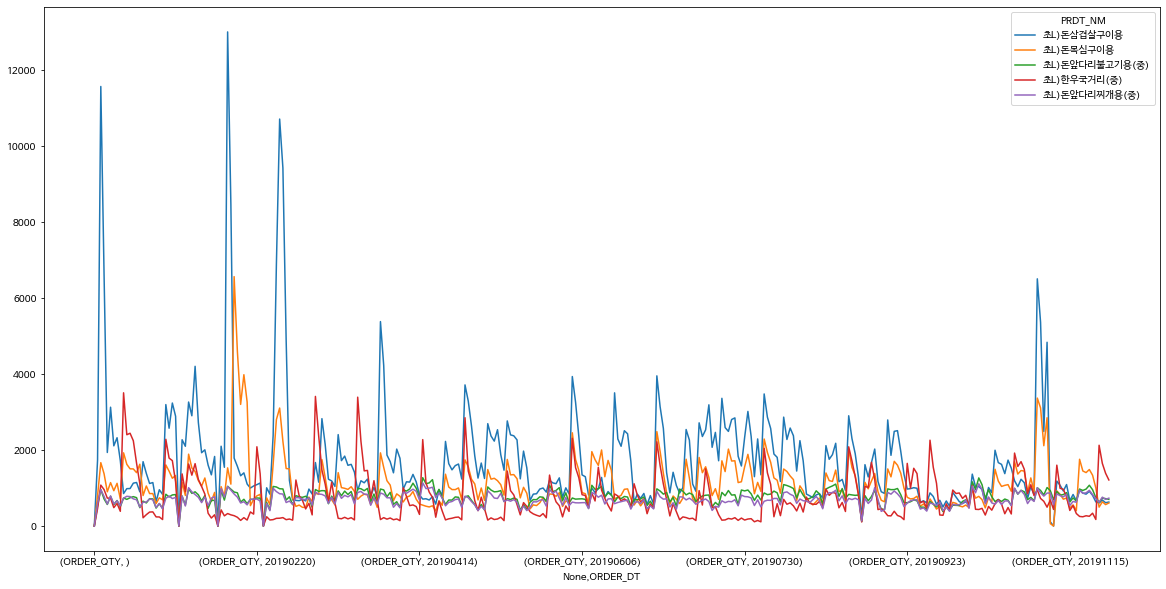

In [329]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=70).get_name()
plt.rc('font', family=font_name)
plt.rcParams['figure.figsize']=(20,10)
# plt.figure(figsize=(6000,200))
df.drop('sum',axis=1).loc['초L)돈삼겹살구이용':'초L)돈앞다리찌개용(중)',:].transpose().plot() #cos 0.99 이상 그래프
plt.show()

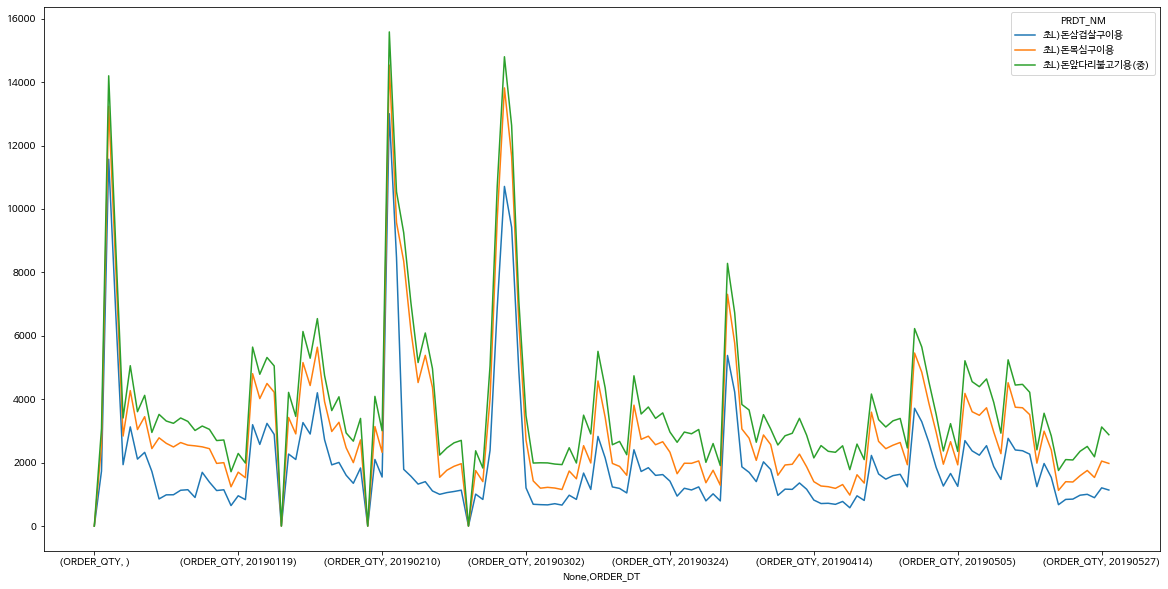

In [24]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=70).get_name()
plt.rc('font', family=font_name)
plt.rcParams['figure.figsize']=(20,10)
# plt.figure(figsize=(6000,200))
df.drop('sum',axis=1)[:3].iloc[:,:142].transpose().plot(stacked=True, rot=0)
plt.show()

In [102]:
df.transpose().index.map(lambda t: pd.datetime(*int(t)))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

In [130]:
df.iloc[:,68:86]

ORDER_QTY                                               \
ORDER_DT          20190911 20190914 20190915 20190916 20190917 20190918   
PRDT_NM                                                                   
초L)돈삼겹살구이용          1174.0    904.0    860.0   2793.0   1862.0   2493.0   
초L)돈목심구이용            900.0    680.0    640.0   1504.0   1296.0   1704.0   
초L)돈앞다리불고기용(중)       643.0    455.0    432.0    979.0    959.0    960.0   
초L)한우국거리(중)          434.0    458.0    385.0    274.0    268.0    390.0   
초L)돈앞다리찌개용(중)        700.0    388.0    431.0    885.0    840.0    924.0   
...                    ...      ...      ...      ...      ...      ...   
초L)돈등심(대)              2.0      1.0      0.0      0.0      4.0      2.0   
초L)1등급한우양지국거리(대)       2.0      0.0      0.0      1.0      4.0      2.0   
초L)돈안심(대)              1.0      3.0      0.0      1.0      3.0      3.0   
초L)돈목심보쌈용(대)           0.0      0.0      0.0      0.0      0.0      0.0   
초L)한우다짐용(중)            0.0      0.0      0.0      0.0      0.0      0.0   

                                                                        \
ORDER_DT         20190919 20190921 20190922 20190923 20190924 20190925   
PRDT_NM                                                                  
초L)돈삼겹살구이용         2511.0   1972.0   1365.0    974.0    986.0   1010.0   
초L)돈목심구이용          1602.0   1395.0   1000.0    758.0    714.0    727.0   
초L)돈앞다리불고기용(중)      989.0    827.0    617.0    615.0    641.0    690.0   
초L)한우국거리(중)         279.0    247.0    170.0   1650.0    998.0   1521.0   
초L)돈앞다리찌개용(중)       849.0    747.0    510.0    603.0    667.0    686.0   
...                   ...      ...      ...      ...      ...      ...   
초L)돈등심(대)             2.0      3.0      1.0      3.0      1.0      3.0   
초L)1등급한우양지국거리(대)      3.0      6.0      0.0      3.0      2.0      1.0   
초L)돈안심(대)             0.0      4.0      0.0      0.0      3.0      3.0   
초L)돈목심보쌈용(대)          2.0      0.0      0.0      0.0      0.0      0.0   
초L)한우다짐용(중)           0.0      0.0      0.0      0.0      0.0      0.0   

                                                                        
ORDER_DT         20190926 20190927 20190928 20190929 20190930 20191001  
PRDT_NM                                                                 
초L)돈삼겹살구이용          995.0    627.0    665.0    613.0    874.0    779.0  
초L)돈목심구이용           786.0    521.0    582.0    463.0    714.0    589.0  
초L)돈앞다리불고기용(중)      666.0    500.0    497.0    441.0    647.0    578.0  
초L)한우국거리(중)        1383.0    610.0    655.0    471.0   2260.0   1550.0  
초L)돈앞다리찌개용(중)       695.0    448.0    481.0    394.0    607.0    584.0  
...                   ...      ...      ...      ...      ...      ...  
초L)돈등심(대)             2.0      1.0      0.0      1.0      5.0      0.0  
초L)1등급한우양지국거리(대)      4.0      1.0      3.0      1.0      4.0      1.0  
초L)돈안심(대)             3.0      0.0      2.0      0.0      4.0      2.0  
초L)돈목심보쌈용(대)          0.0      0.0      0.0      0.0      1.0      0.0  
초L)한우다짐용(중)           0.0      0.0      0.0      0.0      0.0      0.0  

[77 rows x 18 columns]

In [3]:
v=v[['PRDT_NM','INBND_NM','ORDER_DT','ORDER_QTY']]
v['ORDER_QTY']=v['ORDER_QTY'].apply(lambda x:int(x))

In [14]:
lu=v.groupby(['PRDT_NM','INBND_NM','ORDER_DT']).sum().reset_index()

In [15]:
rank=v[['INBND_NM','ORDER_DT','ORDER_QTY']].groupby(['INBND_NM','ORDER_DT']).sum().reset_index()
rank=rank.sort_values('ORDER_QTY',ascending=False)

In [ ]:
lu.to_csv('이천WET센터_점포|일자|상품별_발주량.csv',index=False)

[['독일산냉동삼겹살_(DC)' '잠원점' 10939]]


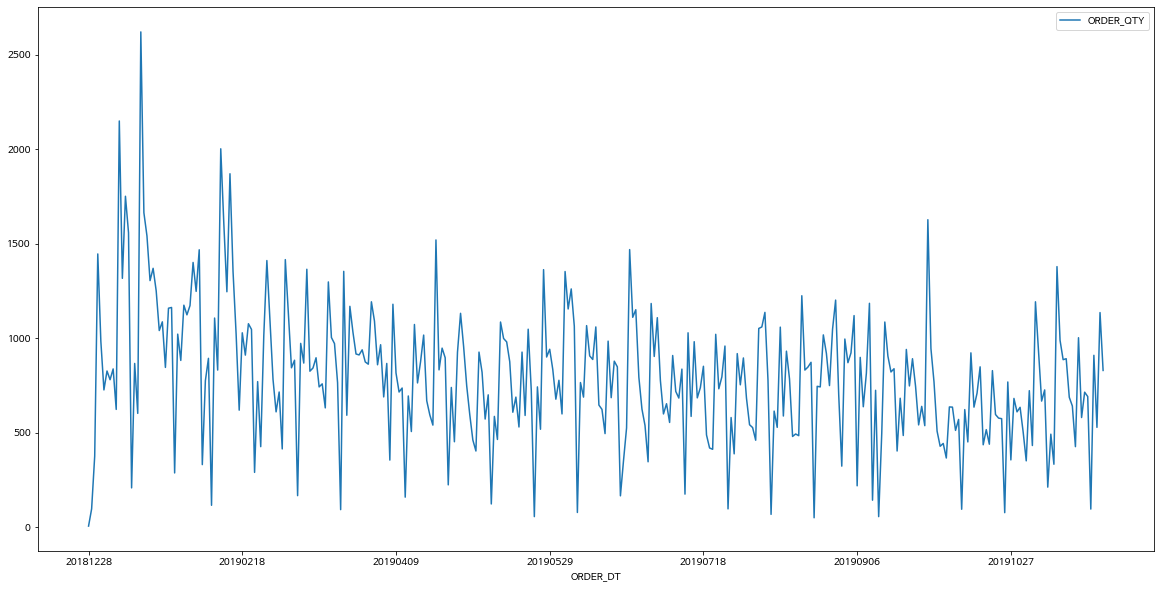

[['미국산냉동우본갈비구이용DC' '범서점' 9999]]


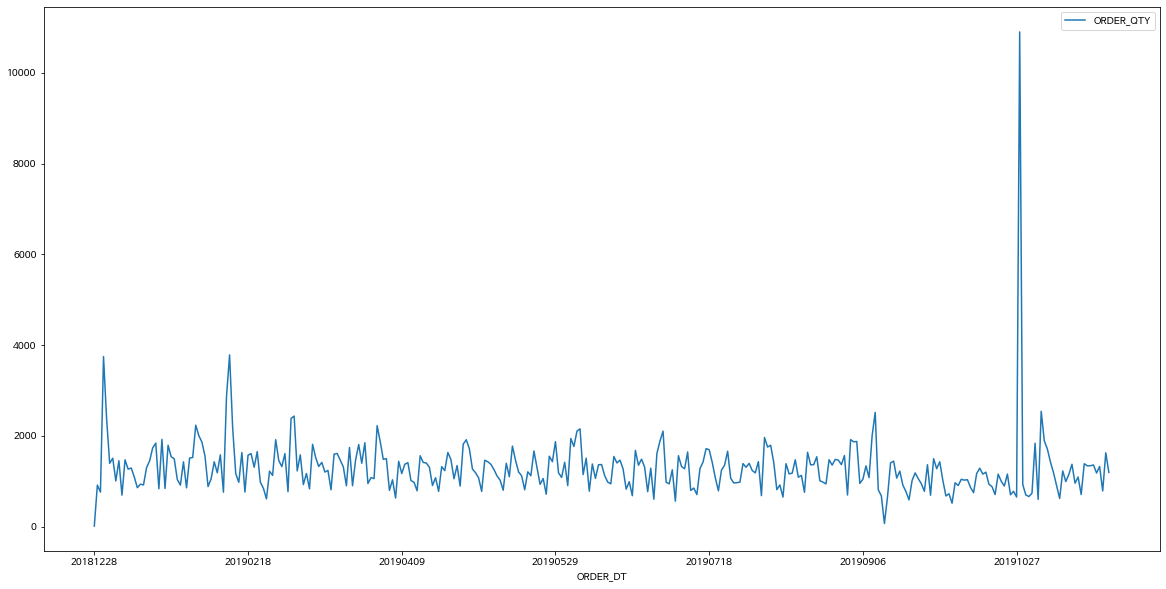

[['한우갈비마구리(1+등급)' '(백)일산점' 2920]]


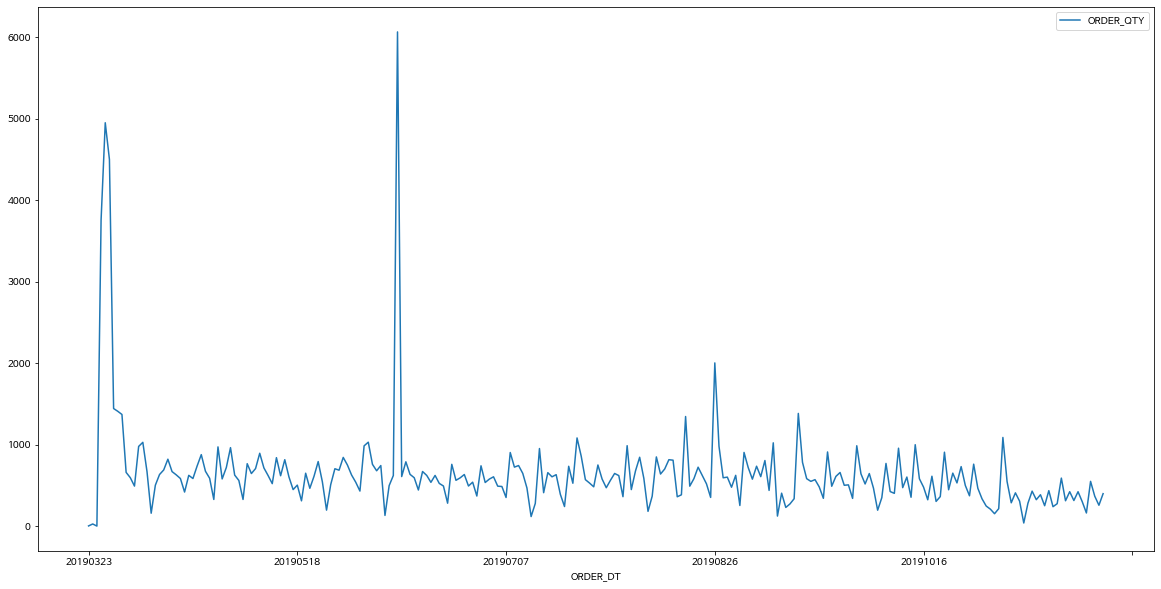

In [46]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=70).get_name()
plt.rc('font', family=font_name)
plt.rcParams['figure.figsize']=(20,10)
# plt.figure(figsize=(6000,200))
rank[rank['INBND_NM']=='잠원점'][['ORDER_DT','ORDER_QTY']].sort_values('ORDER_DT').set_index('ORDER_DT')[:331].plot(stacked=True, rot=0)
print(lu[(lu['INBND_NM']=='잠원점')&(lu['ORDER_DT']=='20191127')].sort_values('ORDER_QTY',ascending=False).iloc[:1,[0,1,3]].values)
plt.show()
rank[rank['INBND_NM']=='범서점'][['ORDER_DT','ORDER_QTY']].sort_values('ORDER_DT').set_index('ORDER_DT')[:331].plot(stacked=True, rot=0)
print(lu[(lu['INBND_NM']=='범서점')&(lu['ORDER_DT']=='20191028')].sort_values('ORDER_QTY',ascending=False).iloc[:1,[0,1,3]].values)
plt.show()
rank[rank['INBND_NM']=='(백)일산점'][['ORDER_DT','ORDER_QTY']].sort_values('ORDER_DT').set_index('ORDER_DT')[:331].plot(stacked=True, rot=0)
print(lu[(lu['INBND_NM']=='(백)일산점')&(lu['ORDER_DT']=='20190611')].sort_values('ORDER_QTY',ascending=False).iloc[:1,[0,1,3]].values)
plt.show()
#점포별 일별 전체 오더량 

In [21]:
rank

,INBND_NM,ORDER_DT,ORDER_QTY
59553,잠원점,20191127,11877
32292,범서점,20191028,10904
78,(백)일산점,20190611,6067
56825,의정부점,20190318,5765
8,(백)일산점,20190402,4952
...,...,...,...
72158,프리미엄황금점,20190927,1
72157,프리미엄황금점,20190925,1
12227,강릉포남점,20191110,1
18000,낙양점,20190308,1


[['독일산냉동삼겹살_(DC)' '잠원점' 10939]]


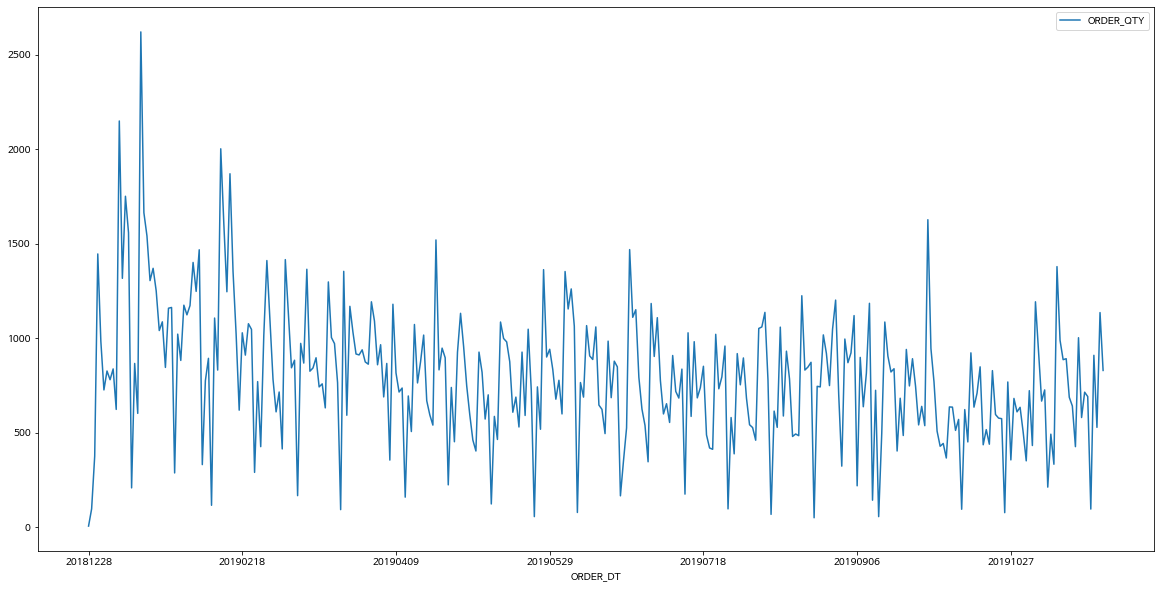

In [47]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list[:10] 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=70).get_name()
plt.rc('font', family=font_name)
plt.rcParams['figure.figsize']=(20,10)
# plt.figure(figsize=(6000,200))
rank[rank['INBND_NM']=='잠원점'][['ORDER_DT','ORDER_QTY']].sort_values('ORDER_DT').set_index('ORDER_DT')[:331].plot(stacked=True, rot=0)
print(lu[(lu['INBND_NM']=='잠원점')&(lu['ORDER_DT']=='20191127')&(lu['PRDT_NM']=='독일산냉동삼겹살_(DC)')].sort_values('ORDER_QTY',ascending=False).iloc[:1,[0,1,3]].values)
plt.show()
#한 상품만 쫓아가면

In [56]:
lu[(lu['INBND_NM']=='잠원점')&(lu['PRDT_NM']=='(구)양념소꽃갈비구이1KG')]

,PRDT_NM,INBND_NM,ORDER_DT,ORDER_QTY
1204,(구)양념소꽃갈비구이1KG,잠원점,20190220,2
1205,(구)양념소꽃갈비구이1KG,잠원점,20190222,2
1206,(구)양념소꽃갈비구이1KG,잠원점,20190304,6
1207,(구)양념소꽃갈비구이1KG,잠원점,20190401,6
1208,(구)양념소꽃갈비구이1KG,잠원점,20190402,1
1209,(구)양념소꽃갈비구이1KG,잠원점,20190404,6
1210,(구)양념소꽃갈비구이1KG,잠원점,20190406,8
1211,(구)양념소꽃갈비구이1KG,잠원점,20190408,15
1212,(구)양념소꽃갈비구이1KG,잠원점,20190409,1
1213,(구)양념소꽃갈비구이1KG,잠원점,20190410,10


In [72]:
df=rank.merge(po,on='INBND_NM',how='left')

In [76]:
df[(df['OUTBND_NM']=='이천WET센터')&(df['INBND_NM']=='잠원점')][['ORDER_DT','ORDER_QTY','LAT','LONG']]

,ORDER_DT,ORDER_QTY,LAT,LONG
0,20191127,11877,37.256102,127.355316
54,20190114,2620,37.256102,127.355316
167,20190107,2149,37.256102,127.355316
248,20190211,2002,37.256102,127.355316
346,20190214,1870,37.256102,127.355316
...,...,...,...,...
86098,20190809,69,37.256102,127.355316
88416,20190524,57,37.256102,127.355316
88564,20190914,57,37.256102,127.355316
89493,20190823,51,37.256102,127.355316


In [81]:
df['ORDER_DT']=df['ORDER_DT'].apply(lambda x:int(x))

In [62]:
po=pd.read_csv('점포센터_위도경도_지역명.csv')
po=po.rename(columns={'CUSTOMER_NAME':'INBND_NM'})

In [155]:
import pandas as pd
import pydeck as pdk
	

df['color'] = df['ORDER_QTY'].apply(lambda val: [255, val * 4,  255, 255])
plottable = df.to_dict(orient='records')
	
view_state = pdk.ViewState(
      latitude=37.0,
      longitude=127.3,
      zoom=8,
      max_zoom=8,
      min_zoom=8)
layer = pdk.Layer(
      'HeatmapLayer',
      plottable,
      get_position='[LONG, LAT]',
      pickable=True,
      get_radius=800)
r = pdk.Deck(
      layers=layer,
      initial_view_state=view_state)

r.to_html("test.html", open_browser=True, notebook_display=False)
	
  # Widget 슬라이더 생성
import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(20190219, min=20190220, max=20191101, step=2)
	
  # Widget에서 사용할 함수 정의 
def on_change(df):
    results = df[df['ORDER_DT'] == slider.value].to_dict(orient='records')
    scatterplot.data = results
    r.update()
	    
  # Deck과 슬라이더 연결
slider.observe(on_change, 'value')
display(slider)

IntSlider(value=20190220, max=20191101, min=20190220, step=2)

In [59]:
!pip install pydeck  #

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.4 MB 1.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [128]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 463 kB 757 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [147]:
df['color'] = df['ORDER_QTY'].apply(lambda val: [255, val * 4,  255, 255])
plottable = df.to_dict(orient='records')
	
view_state = pdk.ViewState(
      latitude=37.0,
      longitude=127.3,
      zoom=8,
      max_zoom=8,
      min_zoom=8)
layer = pdk.Layer(
      'HeatmapLayer',
      df,
      get_position='[LONG, LAT]',
      pickable=True,
      get_radius=800)
r = pdk.Deck(
      layers=layer,
      initial_view_state=view_state)

r.to_html("test.html", open_browser=True, notebook_display=False)

In [154]:
import streamlit as st
import pydeck as pdk

UK_ACCIDENTS_DATA = (
    "file:///D:/Downloads/convert.htm"
)

layer = pdk.Layer(
    "HexagonLayer",
    UK_ACCIDENTS_DATA,
    get_position="[lng, lat]",
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    
    coverage=1,
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-1.415, latitude=52.2323, zoom=6, min_zoom=5, max_zoom=15, pitch=40.5, bearing=-27.36
)

# Combined all of it and render a viewport
r = pdk.Deck(
    map_style="mapbox://styles/mapbox/light-v9",
    layers=[layer],
    initial_view_state=view_state,
    tooltip={"html": "<b>Elevation Value:</b> {elevationValue}", "style": {"color": "white"}},
)
r.to_html("test.html", open_browser=True, notebook_display=False)

In [156]:
results

[{'ORDER_DT': 20190308,
  'ORDER_QTY': 168,
  'LAT': 37.256102399999996,
  'LONG': 127.3553164,
  'color': [255, 672, 255, 255]}]

In [157]:
import plotly.express as px

In [163]:
df['INBND_NM']='잠원점'

In [164]:
fig=px.scatter_mapbox(df,lat='LAT',lon='LONG',hover_name='OUTBND_NM',hover_data=['INBND_NM'])
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [160]:
df

,ORDER_DT,ORDER_QTY,LAT,LONG,color
0,20191127,11877,37.256102,127.355316,"[255, 47508, 255, 255]"
54,20190114,2620,37.256102,127.355316,"[255, 10480, 255, 255]"
167,20190107,2149,37.256102,127.355316,"[255, 8596, 255, 255]"
248,20190211,2002,37.256102,127.355316,"[255, 8008, 255, 255]"
346,20190214,1870,37.256102,127.355316,"[255, 7480, 255, 255]"
...,...,...,...,...,...
86098,20190809,69,37.256102,127.355316,"[255, 276, 255, 255]"
88416,20190524,57,37.256102,127.355316,"[255, 228, 255, 255]"
88564,20190914,57,37.256102,127.355316,"[255, 228, 255, 255]"
89493,20190823,51,37.256102,127.355316,"[255, 204, 255, 255]"
